# Initial exploration of the data

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('C:/Users/KOMAL/data_files/Indicators.csv', sep=',')
data.shape

(5656458, 6)

### How many UNIQUE country names are there?

In [6]:
countries = data['CountryName'].unique().tolist() #tolist = converts data into list
len(countries)

247

### Are there same number of country codes?

In [7]:
# How many UNIQUE country codes ate there? (should be same)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [8]:
# How many UNIQUE indicators are there?  
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### How many years of data do we have?

In [9]:
years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [11]:
print(str(min(years))+" to "+str(max(years)))

1960 to 2015


# Matplotlib: Basic Plotting

### Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [12]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emmissions
stage = data[mask1 & mask2]

In [13]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Let's see how emissions have changed over time using Matplotlib

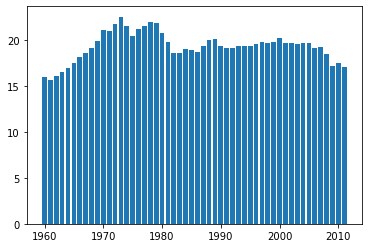

In [14]:
# get the years
years = stage['Year'].values
# get the values
co2 = stage['Value'].values

#create
plt.bar(years,co2)
plt.show()

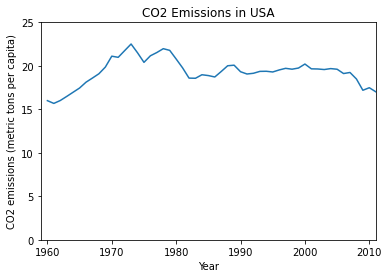

In [15]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])

plt.show()

In [16]:
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [17]:
print(len(hist_data))

52


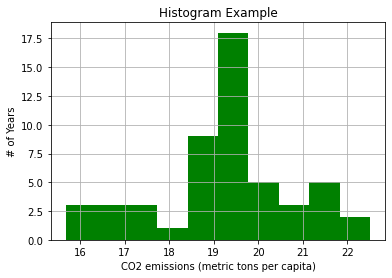

In [18]:
# the histogram ofthe data
plt.hist(hist_data, 10, density=False, facecolor='green')
# density = false means our width of bar will be same
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

So the USA has many years where it produced between 19-20 metric tons per capita with outliers on either side.

### But how do the USA's numbers relate to those of other countries?

In [20]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

#apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


### For how many countries do we have CO2 per capita emissions data in 2011

In [21]:
print(len(co2_2011))

232


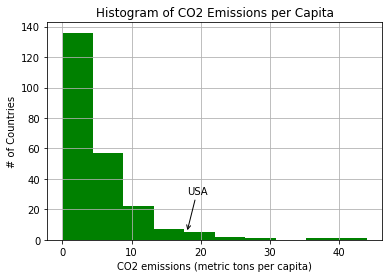

In [22]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a tuple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
           xy=(18, 5), xycoords='data',
           xytext=(18, 30), textcoords='data',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3"),
           )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')
#density: width of your bins false will have all same size of bins.
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

### Relationship between GDP and CO2 Emissions in USA

In [23]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

#stage is just those indicators matching the USA for country code and CO2 emissions
#apply our mask
gdp_stage = data[mask1 & mask2]

In [24]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


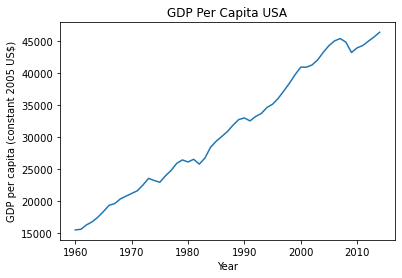

In [25]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959,2011,0,25])
plt.show()

First, we'll need to make sure we're looking at the same time frames.

In [26]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 2011


We have 3 extra years of GDP data, so let's trim those off so the sctterplot has equal length arrays to compare (this is actually required by scatterplot)

In [27]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


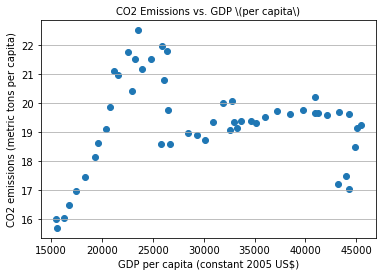

In [28]:
%matplotlib  inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value'] # gdp usa
Y = stage['Value']  #co2 usa

axis.scatter(X, Y)
plt.show()

### More here: http://matplotlib.org/examples/index.html